# Exercise 10 - Case Study - Analyzing USA Population

### The data

In the week-6-Monday class, we will work with the National Health and Nutrition Examination Survey (nhanes) data from the USA National Center for Health Statistics. Read the following web page for more information on this nhanes data: https://www.cdc.gov/nchs/nhanes/about_nhanes.htm. The data file you will work with is compiled from data files downloaded from this website. This prep work is meant for you to get familiar with the data set. On Monday you will be asked to work (semi-)independently on a couple of assignments that will use this same data set.

Download ‘nhanes.csv’ from Canvas. After setting the correct working directory, read in this dataset in R using the command ‘read.csv()’.

In [1]:
nhanes <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Part J - Case Study - Analyzing USA Population/nhanes.csv")

### Question 1: What are the variables in the data set and what is their data type? What are the dimension of the data set?

Multiple options. You can get all this information with one single function.

In [2]:
# Some options that give you some of the information
names(nhanes)

[1] "id"            "year"          "weight"        "height"       
 [5] "gender"        "age_yrs"       "ethn"          "educ"         
 [9] "marital"       "income_class"  "poverty"       "citizenship"  
[13] "household"     "income_mid"    "poverty_class" "years_USA_mid"
[17] "lead_conc"     "age_class"

In [3]:
dim(nhanes)

[1] 16733    18

In [4]:
nrow(nhanes)

[1] 16733

In [5]:
ncol(nhanes)

[1] 18

In [6]:
# All information + data types
str(nhanes)

'data.frame':	16733 obs. of  18 variables:
 $ id           : int  8594 8073 1604 7197 4492 1443 1519 5341 5286 6583 ...
 $ year         : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ weight       : num  34.2 83.6 55.2 64.7 113.9 ...
 $ height       : num  141 167 170 180 173 ...
 $ gender       : Factor w/ 2 levels "F","M": 1 1 1 2 1 1 2 2 2 2 ...
 $ age_yrs      : int  10 19 47 63 24 25 12 50 78 14 ...
 $ ethn         : Factor w/ 5 levels "Mexican American",..: 1 1 3 2 1 3 1 4 1 1 ...
 $ educ         : Factor w/ 5 levels "< 9th grade",..: NA NA 3 2 4 5 NA 1 1 NA ...
 $ marital      : Factor w/ 6 levels "Divorced","Married",..: NA 3 2 4 2 2 NA 3 NA 3 ...
 $ income_class : Factor w/ 13 levels "0 to 4,999","10,000 to 14,999",..: NA 3 11 8 6 6 12 4 6 5 ...
 $ poverty      : num  NA 1.56 5 0.62 3.38 2.47 0.81 0.96 3.48 1.35 ...
 $ citizenship  : Factor w/ 2 levels "citizen ","not_citizen": 2 1 1 1 1 1 1 2 2 1 ...
 $ household    : int  7 2 5 1 2 3 7 2 2 5 ...
 $ income_mid

### Question 2: What survey years are included in the data set and how many participants were there in each survey?

In [7]:
# survey years
unique(nhanes$year)

[1] 2000 2018

In [8]:
# Number of participants per survey
sum(nhanes$year == 2000, na.rm = TRUE)

[1] 8367

In [9]:
sum(nhanes$year == 2018, na.rm = TRUE)

[1] 8366

### Question 3: What income groups are defined in this data set and how many participants were there per income class per survey?

In [10]:
table(nhanes$income_class, nhanes$year)

                  
                   2000 2018
  0 to 4,999        235  249
  10,000 to 14,999  730  364
  15,000 to 19,999  638  485
  20,000 to 24,999  658  489
  25,000 to 34,999  976  866
  35,000 to 44,999  705  824
  45,000 to 54,999  515  544
  5,000 to 9,999    528  236
  55,000 to 64,999  429  531
  65,000 to 74,999  312  395
  75,000 and over  1048 2254
  Over 20,000       272  297
  Under 20,000       39  105

There are two different classifications of income, one that defines 12 income brackets and one that defines only 2 (under and over 20,000). In any analysis that includes income, you’ll have to make a choice and work with one of the two income classification options!

There is another variable income_mid, which includes the mid-value of each income bracket of the first income classification option (the one with 12 income classes). Answer the question “how many participants were there per income class per survey?” again, but now using this variable.

In [11]:
table(nhanes$income_mid, nhanes$year)

        
         2000 2018
  2500    235  249
  7500    528  236
  12500   730  364
  17500   638  485
  22500   658  489
  30000   976  866
  40000   705  824
  50000   515  544
  60000   429  531
  70000   312  395
  87500     0  765
  100000 1048 1489

Since the income class of 75,000 and over doesn’t have a mid-value (no known upper limit), a value of 100,000 is used instead.

### Question 4: What educational levels are defined in this data set and how many participants obtained each of these educational levels
Try to use one line of code with a single function to get the answer to both questions

In [12]:
table(nhanes$educ, nhanes$year)

                           
                            2000 2018
  < 9th grade                797  454
  9-11th grade               833  598
  college graduate or above  674 1261
  High School                954 1251
  some college or AA         947 1689

Plot the data as a barplot

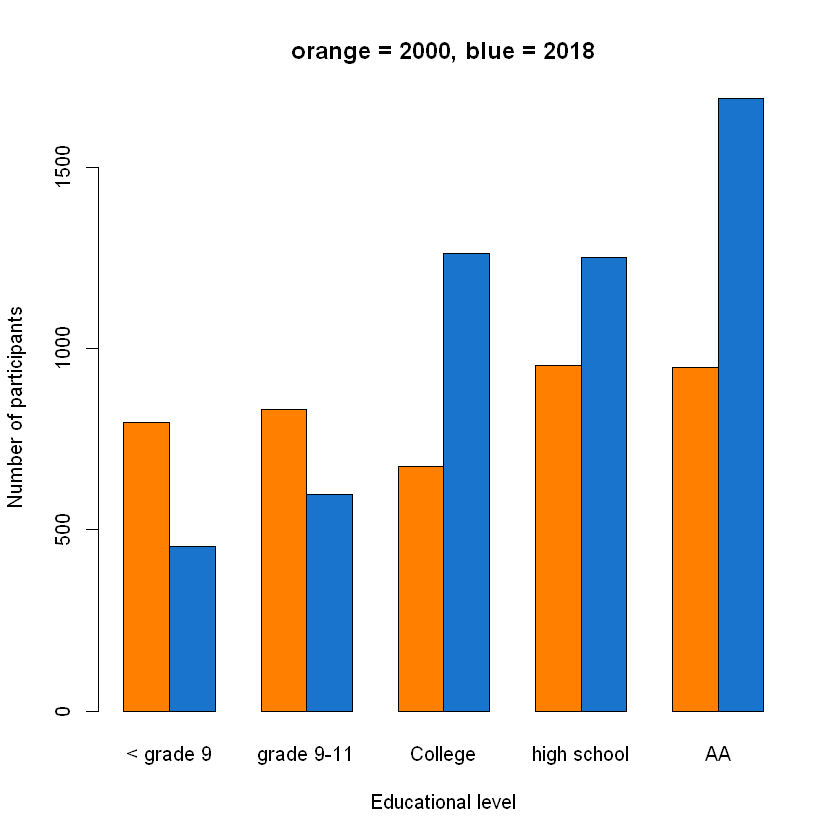

In [13]:
barplot(table(nhanes$year, nhanes$educ), 
        beside = TRUE, 
        names.arg = c("< grade 9", "grade 9-11", "College", "high school", "AA"),
        col = c("darkorange1", "dodgerblue3"),
        main = "orange = 2000, blue = 2018",
        xlab  = "Educational level", 
        ylab = "Number of participants")

### Question 5: Does the distribution of participants among ethnicities differ between the two survey years?

In [14]:
unique(nhanes$ethn)

[1] Mexican American     Non-Hispanic White   Non-Hispanic Black  
[4] Other Hispanic       Other Race and multi <NA>                
5 Levels: Mexican American Non-Hispanic Black ... Other Race and multi

Since ethnicity is a categorical variables, we can’t calculate means or medians and other related statistics to characterize the distribution of participants among ethnic groups. However, you can calculate the frequency of participants per ethnicity (rows) and year (columns). Try to do this.

In [15]:
table(nhanes$ethn, nhanes$year)

                      
                       2000 2018
  Mexican American     2866 1229
  Non-Hispanic Black   1974 1949
  Non-Hispanic White   2818 2792
  Other Hispanic        479  738
  Other Race and multi  230 1083

In [16]:
# The number of participants is basically the same, so we can directly compare
# number of participants per group, no need to convert numbers to percentages.
# But still, a comparison in terms of percentages might be more insightful.
# This is one way of doing that. 

nhanes2000 <- nhanes[nhanes$year == 2000, ]

# the round() function rounds a number to the indicated number of digits after the decimal point
round(100 * table(nhanes2000$ethn, nhanes2000$year) / sum(nhanes == 2000, na.rm = TRUE), digits = 1)

                      
                       2000
  Mexican American     34.2
  Non-Hispanic Black   23.6
  Non-Hispanic White   33.7
  Other Hispanic        5.7
  Other Race and multi  2.7

In [17]:
nhanes2018 <- nhanes[nhanes$year == 2018,]

round(100 * table(nhanes2018$ethn, nhanes2018$year) / sum(nhanes == 2018, na.rm = TRUE), digits = 1)

                      
                       2018
  Mexican American     14.7
  Non-Hispanic Black   23.3
  Non-Hispanic White   33.4
  Other Hispanic        8.8
  Other Race and multi 12.9

You can plot this data in a barplot. Plot the data as pairs of bars (2000 and 2018) per ethnic group. Define the colors of the bars, add graph title and y-axis and x-axis titles (when appropriate), project x-axis labels perpendicular to the axis and shorten bar labels with the argument names.arg if necessary, and add a legend.

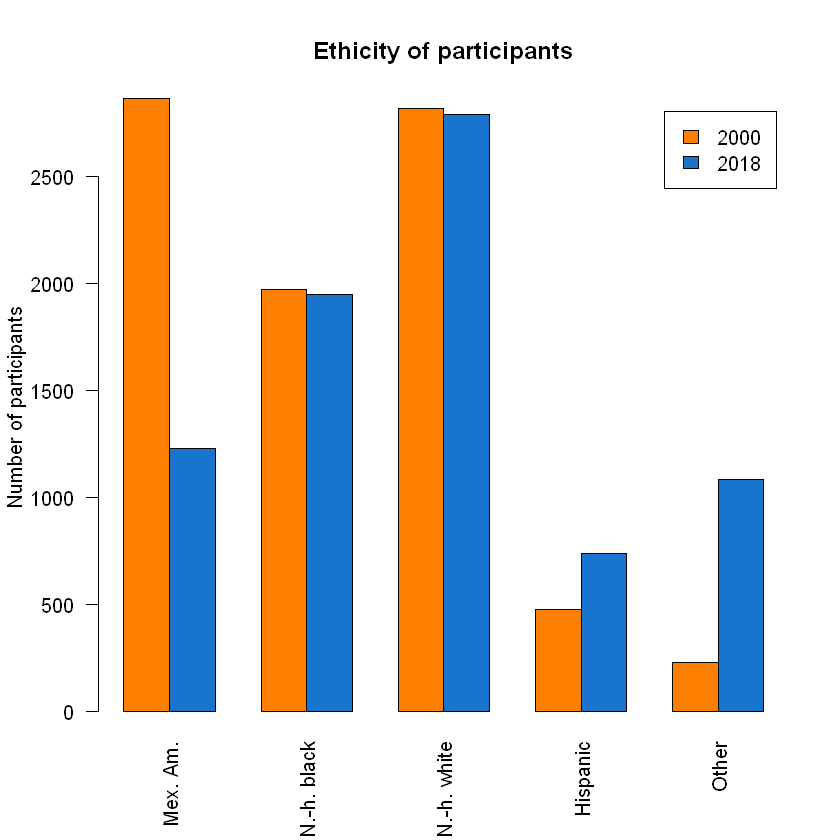

In [18]:
barplot(table(nhanes$year, nhanes$ethn), 
        beside = TRUE, 
        las = 2, 
        col = c("darkorange1", "dodgerblue3"),
        legend = TRUE,
        main = "Ethicity of participants", 
        ylab = "Number of participants",
        names.arg =
          c("Mex. Am.", "N.-h. black", "N.-h. white", "Hispanic", "Other"))

### Question 6: Does the age distribution of participants differ between the two survey years?

Calculate summary statistics of age_yrs for both years.

In [19]:
# Some of the many options
summary(nhanes[nhanes$year == 2000, "age_yrs"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   12.00   20.00   30.52   49.00   85.00 

In [20]:
summary(nhanes[nhanes$year == 2018, "age_yrs"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   12.00   33.00   35.83   59.00   80.00 

Use the aggregate() function to get the mean age of the participants per survey year



In [21]:
aggregate(age_yrs ~ year, data = nhanes, FUN = mean)

year,age_yrs
2000,30.51787
2018,35.83003


Compare the age distribution of the two years graphically using boxplots. Add appropriate graph, x-axis and y-axis titles.

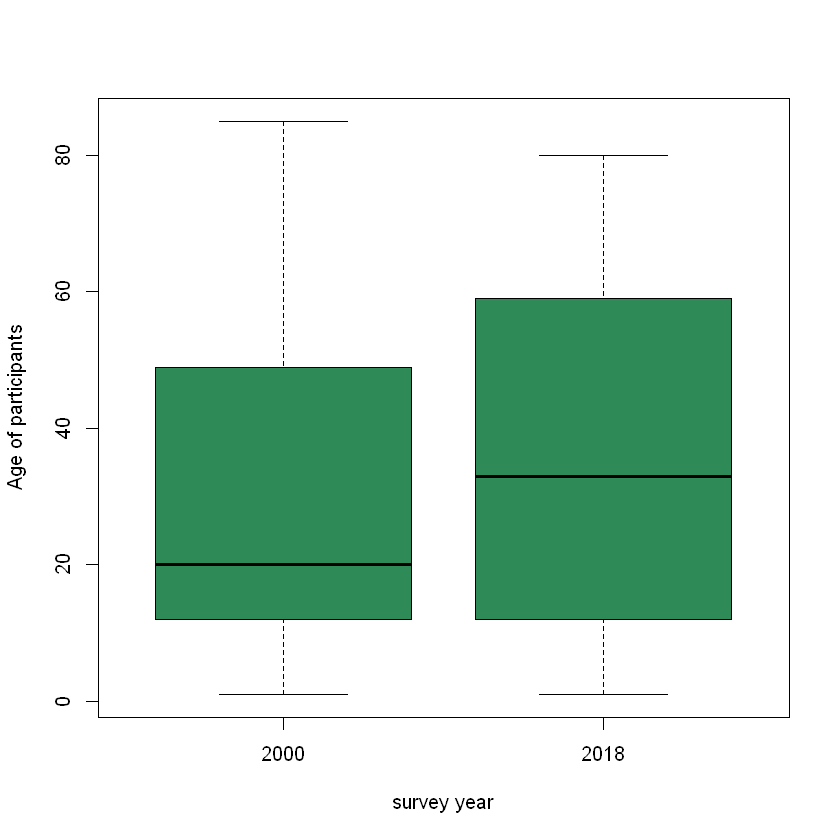

In [22]:
boxplot(age_yrs ~ year,
        data = nhanes,
        col = "seagreen4",
        xlab = "survey year",
        ylab = "Age of participants")

Compare the age distribution of the two years graphically using a separate histogram for each of the two years. Add appropriate graph, x-axis and y-axis titles, use different colors for each of the two years. Plot the two histograms next to each other in a single graphical display. Make sure the range of values is the same on the y-axis of both graphs.

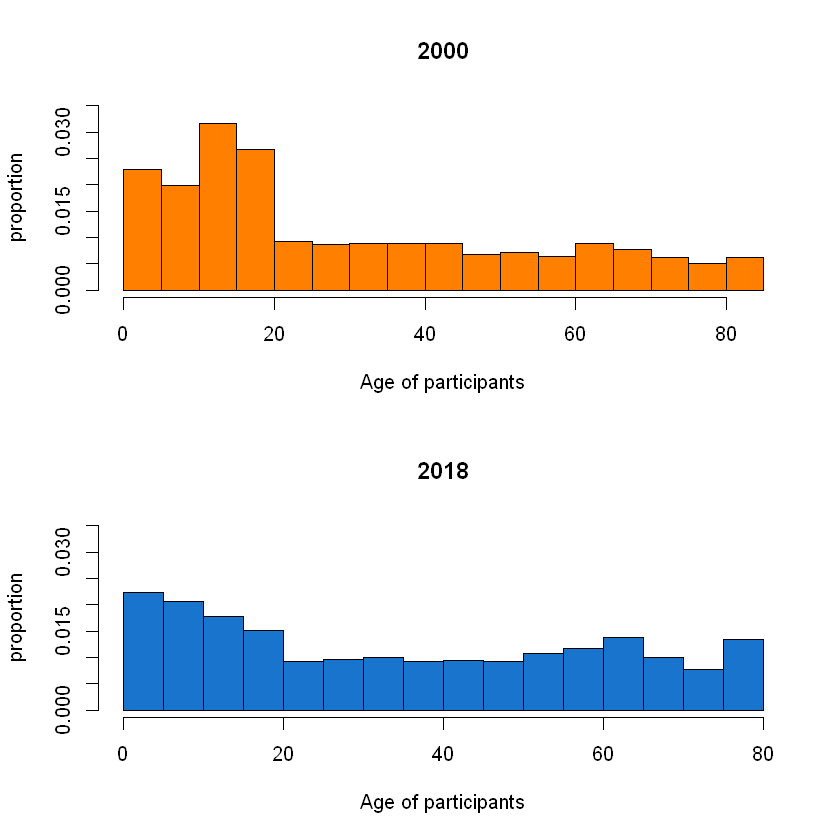

In [24]:
par(mfrow = c(2,1))

hist(nhanes[nhanes$year == 2000,]$age_yrs,
        col = c("darkorange1"),
        freq = FALSE,
        xlab="Age of participants",
        ylab = "proportion",
        main = 2000,
        ylim = c(0, 0.035))

hist(nhanes[nhanes$year == 2018,]$age_yrs,
        col = c("dodgerblue3"),
        freq = FALSE,
        xlab="Age of participants",
        ylab = "proportion",
        main = 2018,
        ylim = c(0, 0.035))